### Graphs

- A **graph** is pair $(V, E)$, where elements of $E$ are *two-element* subsets of $V$.

- Elements of $V$ are called **vertices** or **nodes**. Elements of $E$ are called **edges**. If $e=\{v,w\}\in E$, we say that the edge $e$ joins the vertices $v$ and $w$.

- Below is are examples with $$V=\{u, v, w\},\quad E=\big\{\{u, v\}, \{v, w\}, \{w, u\}\big\}$$
and with
$$V=\{a, b, c, d\},\quad E=\big\{\{a, c\}, \{a, d\}, \{b, c\}, \{b, d\}\big\}.$$

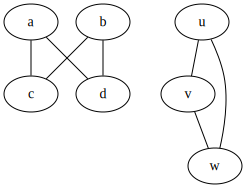

In [22]:
from graphviz import Graph
g = Graph(name="A graph")
# add nodes to g
g.node("a"); g.node("b"); g.node("c"); g.node("d")
g.node("a"); g.node("b"); g.node("c"); g.node("d")
# specify edges as pairs of vertices you've already added to g
g.edge("u", "v"); g.edge("v", "w"); g.edge("w", "u")
g.edge("a", "c"); g.edge("a", "d"); g.edge("b", "c"); g.edge("b", "d")
g

### Cycles

- A **path** in a graph $G$ is a sequence of vertices, $v_1,v_2,\ldots,v_n$,
such that $\{v_i, v_{i+1}\}\in E$ for all $i=1,\ldots,n-1$. Such a path is called a **cycle** if $v_n = v_1$.

- In the above examples, $a, c, b, d, a$ and $u, v, w, u$ are cycles.

- A graph is **connected** if every pair of vertices of $G$ are joined by a path.

### Trees

- A **tree** is a connected graph that has no cycles. Here are some examples:

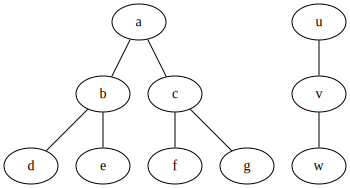

In [121]:
from graphviz import Graph
g = Graph()
g.node("a"); g.node("b"); g.node("c"); g.node("d"); g.node("e"); g.node("f"); g.node("e")
g.edge("a", "b"); g.edge("a", "c");
g.edge("b", "d"); g.edge("b", "e")
g.edge("c", "f"); g.edge("c", "g")
g.node("u"); g.node("v"); g.node("w")
g.edge("u", "v"); g.edge("v", "w")
g

Not quite a tree:

<img src="League_of_Nations_Organization.png" />

By <a href="//commons.wikimedia.org/wiki/User:SlvrKy" title="User:SlvrKy">Martin Grandjean</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=63389413">Link</a>

<img src="https://imgs.xkcd.com/comics/tree.png" />

From <a href="https://xkcd.com/835/">xkcd</a>, by Randall Munroe

### Roots and leaves


- Sometimes, trees come with a distinguished vertex called a **root**. A tree with a distinguished root is called a **rooted tree**. 

- A vertex $v$ of a tree, $T$, is a **leaf** if $v$ belongs to only one edge and, if $T$ is rooted, $v$ is not the root of $T$.

- Rooted trees are usually drawn with the root at the top and the leaves at the bottom. (This is not the way trees grow in nature...)

### Trees for regression and classification

- In this course, we're most concerned with using trees for regression and classification.

- We'll call the trees we encounter in this context **decision trees** because paths from their roots to their leaves correspond to sequences of decisions.

- Below is an example of a classification tree for the breast cancer dataset.

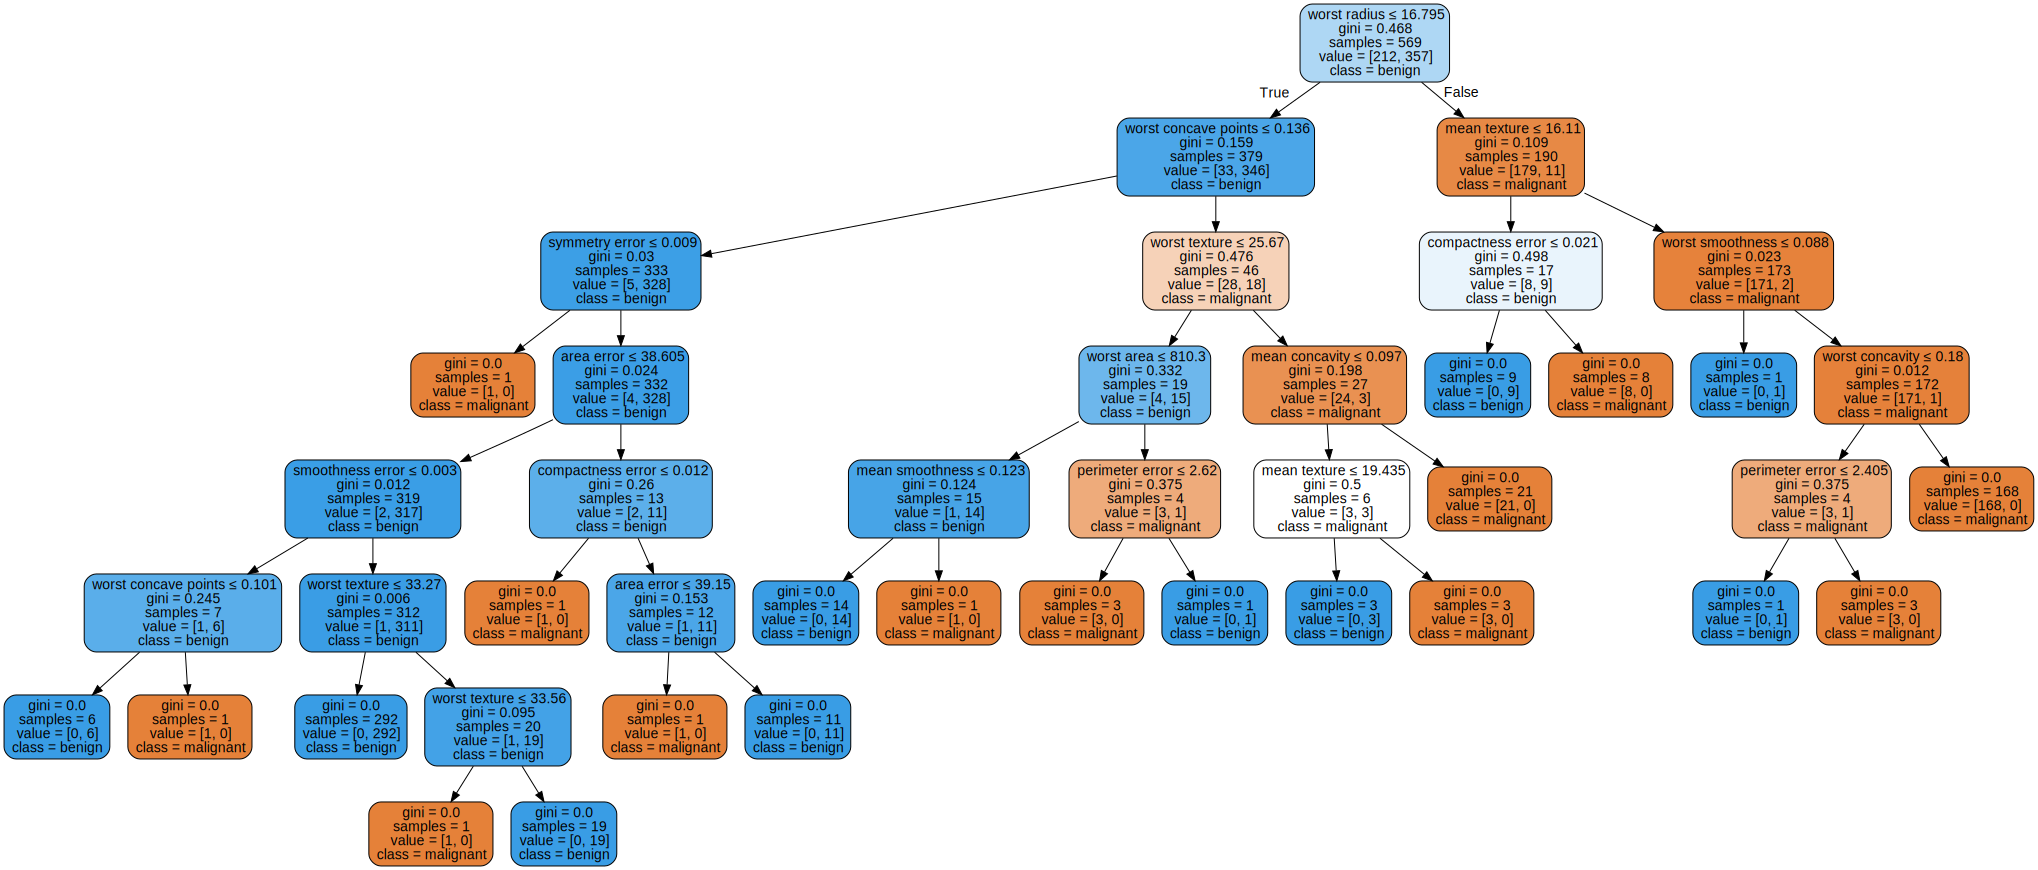

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

data = load_breast_cancer()
data.feature_names
C = DecisionTreeClassifier()
C.fit(X, y)
dot_data = export_graphviz(C, out_file=None, 
                      feature_names=data.feature_names,
                      class_names=data.target_names,
                      filled=True, rounded=True,  
                      special_characters=True)  
g = graphviz.Source(dot_data)  
g

### Representating, walking, and manipulating trees in python

- To work competently with regression and classification trees like the above, we'll discuss some fundamental techniques for working with abstract trees in python.

- Let model a tree, `T` as a python dictionary such that
  - `T` has a field `node_id` whose value is not shared by any other node in `T`.
  - `T` has a field `children` whose value is a list of trees.
  
  `T` can have other fields for storing auxilliary data.
  
- Note that this model is **recursive**.

{'node_id': 'A', 'children': [{'node_id': 'B', 'children': [{'node_id': 'D', 'children': []}]}, {'node_id': 'C', 'children': []}]}


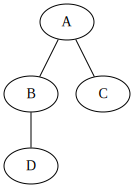

In [98]:
T = {"node_id": "A", "children": [{"node_id": "B", "children": [{"node_id": "D", "children": []}]}, {"node_id": "C", "children": []}]}
print(T)

from graphviz import Graph
g = Graph()
g.node("A"); g.node("B"); g.node("C"); g.node("D");
g.edge("A", "B"); g.edge("A", "C"); g.edge("B", "D");
g


### Walking trees

- Due to the recursive nature of our tree model, it's not immediately evident how to "loop over" all the nodes of a tree.

- We'll write a function that prints out the `node_id` of every node in a tree.

In [116]:
def walk(T):
    print(f"We just visited node {T['node_id']}.")
    for t in T["children"]:
        walk(t)
        
def walk_and_apply(T, f):
    f(T)
    for t in T["children"]:
        walk_and_apply(t, f)


def f(T):
    global count
    count = count + 1
    print(f"Node {T['node_id']} is the {count}th node visited.")
    
count = 0
walk_and_apply(T, f)

Node A is the 1th node visited.
Node B is the 2th node visited.
Node D is the 3th node visited.
Node C is the 4th node visited.


- The **depth** of a vertex, $v$, in a rooted tree is the number of edges in a path from the root to $v$.

### Exercise
- Write a function that prints the `node_id` and the depth of every vertex in a tree.

In [118]:
def print_depths(T, depth=0):
    print(f"Node {T['node_id']} is at depth {depth}.")
    # Your code here.
    
print_depths(T)

Node A is at depth 0.
Node B is at depth 1.
Node D is at depth 2.
Node C is at depth 1.


Node A is at depth 0.
Node B is at depth 1.
Node D is at depth 2.
Node E is at depth 2.
Node C is at depth 1.
Node F is at depth 2.
Node G is at depth 2.


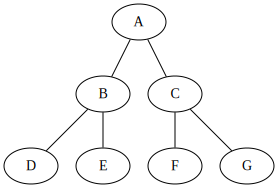

In [125]:
R = {"node_id": "B", "children": [{"node_id": "D", "children": []}, {"node_id": "E", "children": []}]}
S = {"node_id": "C", "children": [{"node_id": "F", "children": []}, {"node_id": "G", "children": []}]}
T = {"node_id": "A", "children": [R, S]}
print_depths(T)

T3 = Graph()
T3.edge("A", "B"); T3.edge("A", "C")
T3.edge("C", "F"); T3.edge("C", "G")
T3.edge("B", "D"); T3.edge("B", "E")
T3

### Exercise
- Write a function transforms a tree, represented as nested dictionaries, into a `graphviz` graph.

In [142]:
from graphviz import Graph

def to_graphviz(T, g):
    # Your code here.
    return g

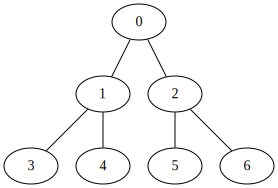

In [149]:
R = {"node_id": "1", "children": [{"node_id": "3", "children": []}, {"node_id": "4", "children": []}]}
S = {"node_id": "2", "children": [{"node_id": "5", "children": []}, {"node_id": "6", "children": []}]}
T = {"node_id": "0", "children": [R, S]}

g = Graph()
g = to_graphviz(T, g)
g

### Another tree representation

- A **binary tree** is a rooted tree in which every non-leaf node has two children, one *left* and one *right*.

- Let `T` be a binary tree with `n` nodes. Label its vertices by integers `0` through `n-1` such that vertex `0` is the root of `T`.

- Represent `T` be a pair of lists, `children_left` and `children_right`, of length `n` such that
  - `children_left[i]` is the label of the left child of the vertex with label `i`, if such exists, and `-1`, otherwise.
  - `children_right[i]` is the label of the right child of the vertex with label `i`, if such exists, and `-1`, otherwise.
 
- For example, the symmetric binary tree with $7$ vertices can be represented as follows:

In [ ]:
children_left = [1, 3, 5, -1, -1, -1, -1]
children_right = [2, 4, 6, -1, -1, -1, -1]

### Exercise

- Write functions to translate between the two representations of trees.